In [4]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import numpy as np

from lrv_test import LRV


import seaborn as sns
from lrv_test.types import real_function

from data_generation.spectral_density import arma_spectral_density
from data_generation.arma import generate_arma_sample
from lrv_test.lag_window import lag_window

sns.set_style("whitegrid")

In [38]:
ar, ma = 0.5, 0.5
n_samples, n_features = 10_000, 300

# true spectral density of y
oracle_sd = arma_spectral_density(ar, ma)

# generate a specific ARMA time series
y = generate_arma_sample(n_samples, n_features, ar, ma, is_complex_gaussian=True)

# check lag window estimator

/Users/alexisrosuel/micromamba/envs/lrv312/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/alexisrosuel/micromamba/envs/lrv312/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


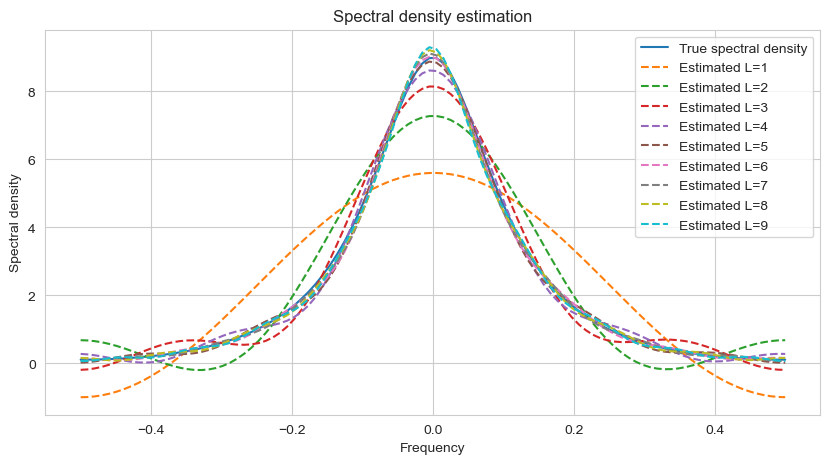

In [39]:
# just keep the 1st component of y
y1 = y[:, :1]

# plot the true spectral density
fig, ax = plt.subplots(figsize=(10, 5))
freqs = np.linspace(-0.5, 0.5, 100)
ax.plot(freqs, oracle_sd(freqs), label="True spectral density")

for L in range(1, 10):
    estimated_sd = lag_window(y1, L)
    estimated_sd_values = [estimated_sd(f) for f in freqs]
    ax.plot(freqs, estimated_sd_values, label=f"Estimated {L=}", linestyle="--")

ax.legend()
ax.set_title("Spectral density estimation")
ax.set_xlabel("Frequency")
ax.set_ylabel("Spectral density")
plt.show()

# Corrective term
In this notebook we check that the corrective terms computed in the paper are matching with lss - int f d_mp 

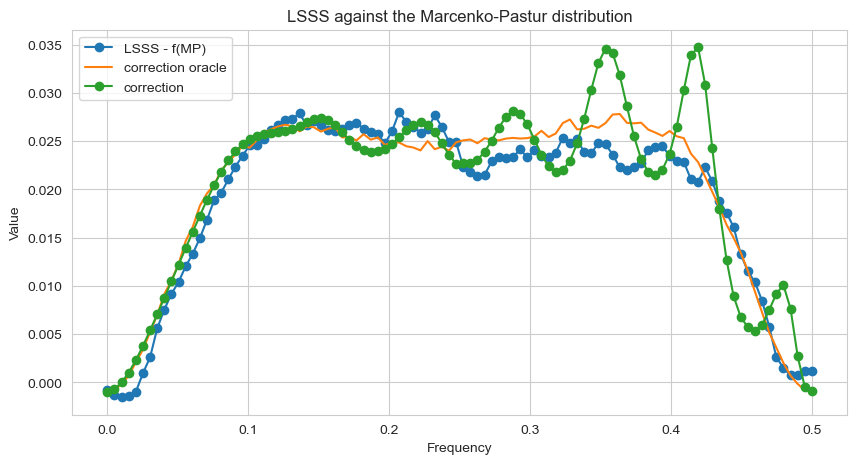

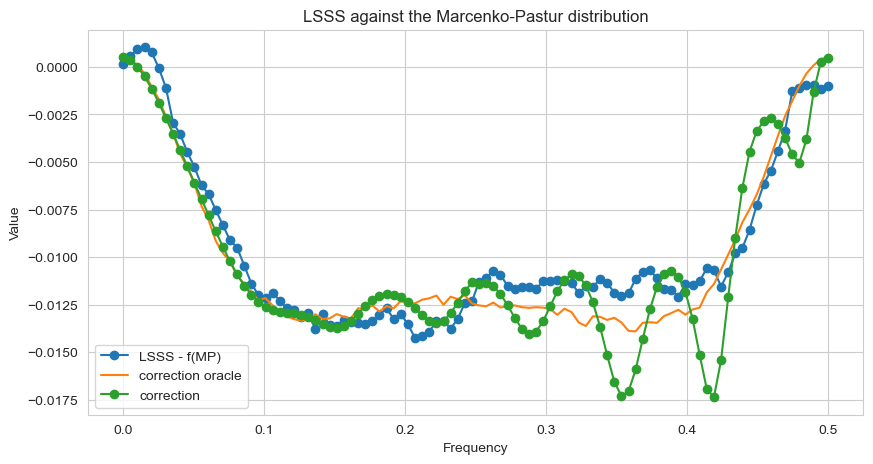

In [43]:
# config for the LRV test
B, L = 1001, 15
c = n_features / B
fs = [lambda x: (x - 1) ** 2, lambda x: np.log(x)]
freqs = np.linspace(0, 0.5, 100)

for f in fs:
    # run the test for both the oracle and estimated spectral density
    # sigma is set to some arbitraty value, just to avoid computing it
    lrv_result_oracle = LRV(y, B, f, freqs, L, oracle_sd, sigma=1)
    lrv_result = LRV(y, B, f, freqs, L, sigma=1)

    # plot for each nu the LSSS of the estimated spectral coherency
    # against the Marchenko-Pastur distribution and the corrective terms
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(
        lrv_result.freqs,
        lrv_result.LSSs - lrv_result.f_mp,
        label="LSSS - f(MP)",
        marker="o",
    )
    ax.plot(lrv_result.freqs, lrv_result_oracle.corrections, label="correction oracle")
    ax.plot(lrv_result.freqs, lrv_result.corrections, label="correction", marker="o")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Value")
    ax.set_title("LSSS against the Marcenko-Pastur distribution")
    ax.legend()
    plt.show()

    Path("./plots/correction").mkdir(parents=True, exist_ok=True)
    fig.savefig("./plots/correction.png", bbox_inches="tight")